In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

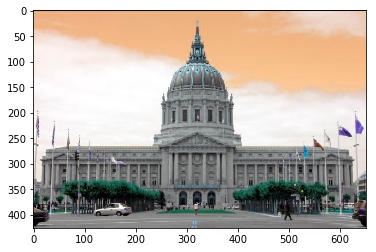

In [6]:
image = cv2.imread('city_hall.jpg')
plt.imshow(image)

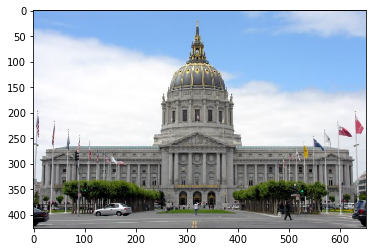

In [8]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

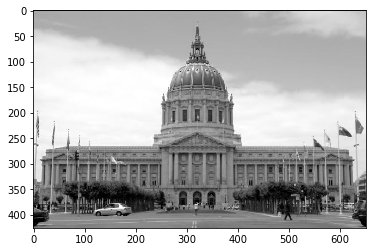

In [10]:
gray=cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

I'll create a custom edge detection filter.
I want to build one that detects vertical edges and ignores horizontal edges.
I'll do this by making a three by three matrix and using values that will
calculate the difference between the left and right sides of this pixel area in an image.
I'm starting with an empty three by three kernel.
I'll put negative values on the left side,weighty in the corners,less in the edges right next to the center pixel.
I'll put zeros in the center column and then positive values on the right side.
This kernel one centered on an image pixel will calculate the difference
between pixels on the right side and the left thereby detecting vertical edges.
This is actually a really common filter called the sobel filter.
The sobel filter detects abrupt intensity changes in the x and y direction separately.
This one is an approximation of the gradient or change in intensity over
space in the x direction and I'll actually name it sobel X.


In [12]:
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

Then, to convolve this filter with the input image, I'll use an openCV function called Filter2D.
This function takes in an input image, the type of output image,a negative one just means the output will have the same type as the input image,
and finally the kernel we just created,sobel X, and it produces a filtered image.

In [13]:
filtered_image = cv2.filter2D(gray,-1,sobel_x)

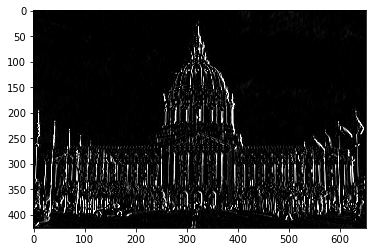

In [15]:
plt.imshow(filtered_image,cmap='gray')

I see basically what I expected.All the vertical edges are highlighted and this kind of filter helps me detect the vertical edges of the building and the structures that surround it.

My last step which is a useful thing to learn in computer vision is turning this image into a binary image.
That is, I want to turn this into a purely black and white image with the strongest edges clearly visible.
To do that I can use the openCV function threshold. This takes in our filtered image that we want to perform the threshold on,a low value for the pixel values to pass through and I'll set this at a medium high level at 100.Then it takes in the pixel value to turn these all into which I'll set as white or 255.And finally the type of threshold,









In [16]:
retval, binary_image = cv2.threshold(filtered_image,100,255,cv2.THRESH_BINARY)

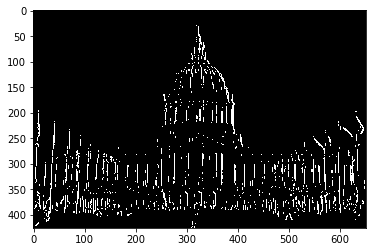

In [17]:
plt.imshow(binary_image,cmap='gray')